### Hilbert DDPM for 1D toy example

In [9]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from util import get_V_and_A,get_x_0_for_1D_DDPM,gp_sampler,np2torch, get_x_0_for_quadratic_DDPM,torch2np,power_test
from ddpm import get_ddpm_constants,plot_ddpm_constants,ddpm_train_wrapper
from model import DenoisingDenseUNetClass
np.set_printoptions(precision=2)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rc('xtick',labelsize=5); plt.rc('ytick',labelsize=5)
print ("Ready.")

Ready.


### Diffusion constants

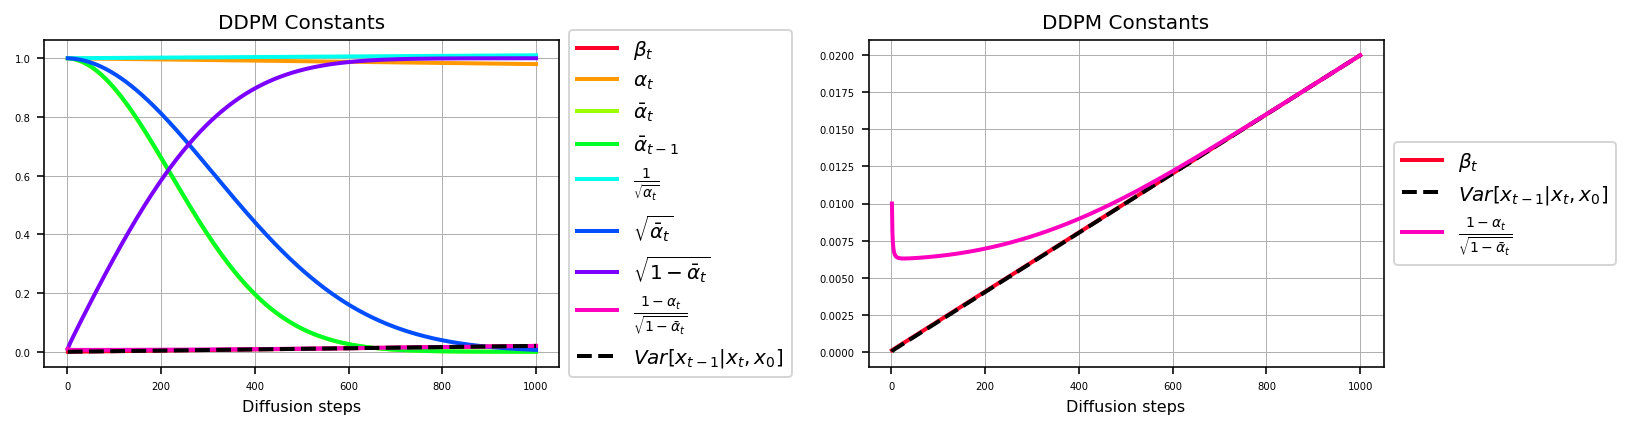

In [2]:
# Smaller `beta_end` tends to show better performances
dc = get_ddpm_constants(beta_start=1e-4,beta_end=2e-2,diffusion_step=1000)
plot_ddpm_constants(dc,figsize=(12,3))

### Commmon hyper-parameters

In [3]:
BATCH_SIZE,D,L = 128,1,100
base_lr,MAX_ITER = 1e-4,50000
actv = nn.ReLU() # nn.GELU(), nn.ReLU()
l1_w,l2_w,huber_w,smt_l1_w = 1.0,1.0,0.0,0.0
device = 'cuda:2' # cpu / mps / cuda
print(device)
print ("Ready.")

cuda:2
Ready.


### Training data

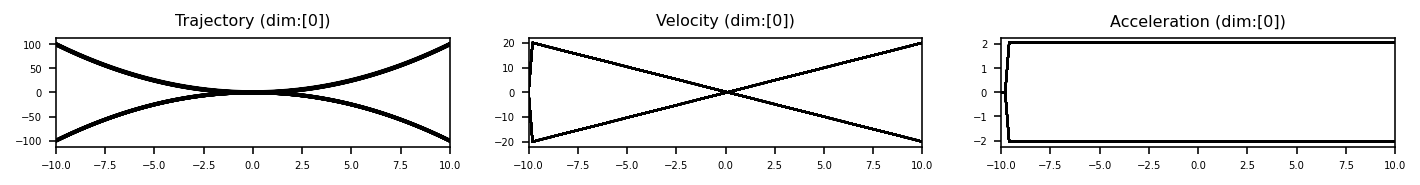

Ready.


In [4]:
times = np.linspace(start=-10.0,stop=10.0,num=L).reshape((-1,1)) # [L x 1]
# x_0,V,A = get_x_0_for_1D_DDPM(times,D=1,M=10,USE_SINGLE_TRAJECTORY=False,device='cpu')
x_0,V,A = get_x_0_for_quadratic_DDPM(times,D=1,M=256,USE_SINGLE_TRAJECTORY=False,device='cpu')
print ("Ready.")

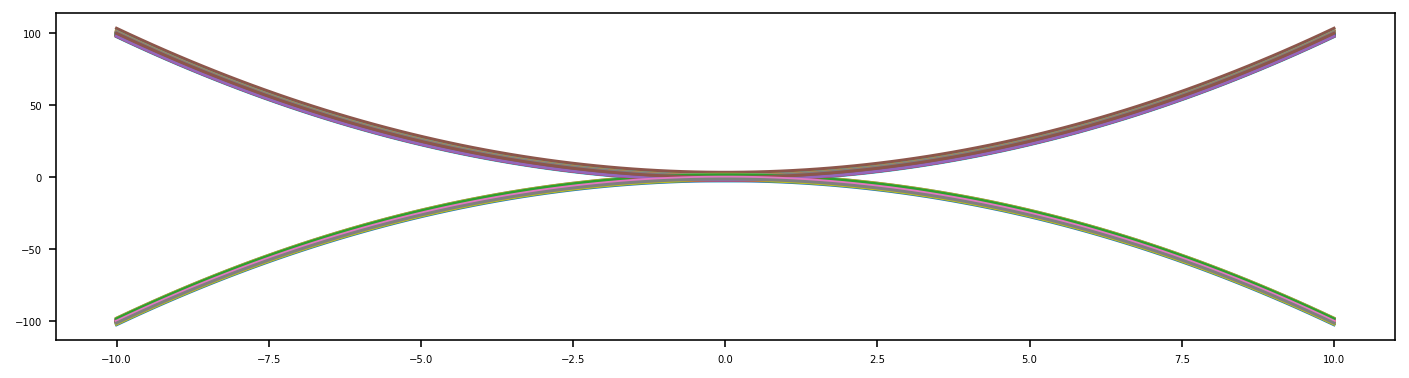

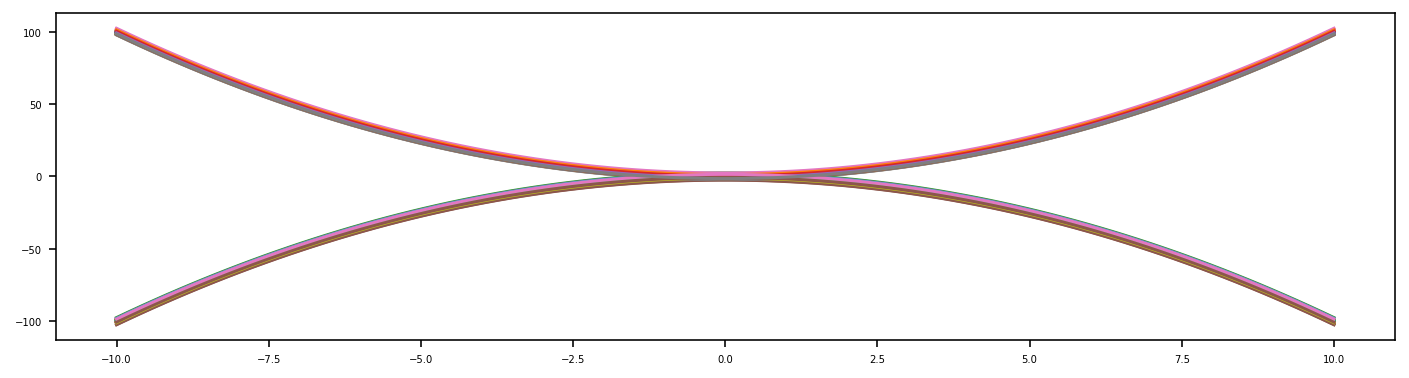

In [5]:
x_train, x_val = x_0[:128], x_0[128:]

times = np.linspace(-10, 10, 100)
plt.figure(figsize=(12,3))

for i in range(BATCH_SIZE):
    plt.plot(times,x_train[i,0,:],label='x_train')
# plt.plot(times,x_val[0,:],label='x_val[0]')
    # plt.legend()
plt.show()

plt.figure(figsize=(12,3))

for i in range(BATCH_SIZE):
    plt.plot(times,x_val[i,0,:],label='x_val')
    # plt.legend()
plt.show()


### Diffusion DDPM 

SE kernel length parameter =  1.0
[0/10000][0.00%] train loss:[2.628]
  [l1]:[1.010]
  [l2]:[1.617]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[0/10000][0.00%] valid loss:[2.996]
  [l1]:[1.057]
  [l2]:[1.939]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


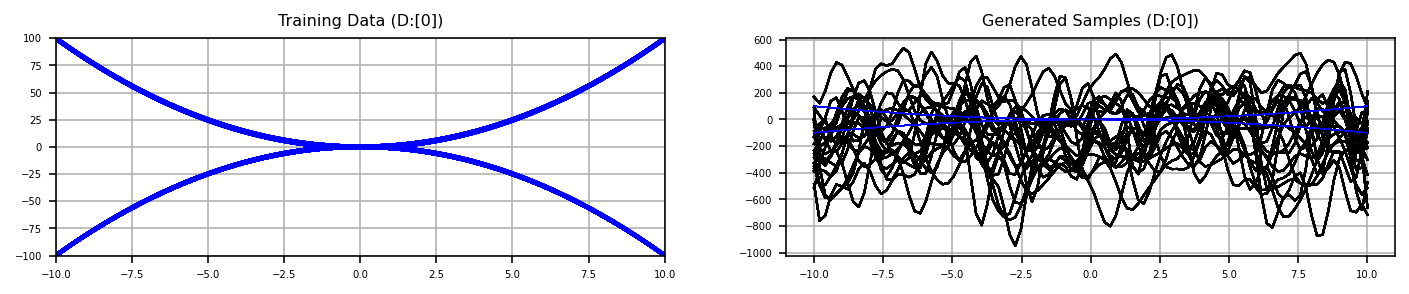

[500/10000][5.00%] train loss:[1.120]
  [l1]:[0.569]
  [l2]:[0.550]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[500/10000][5.00%] valid loss:[1.123]
  [l1]:[0.569]
  [l2]:[0.553]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[1000/10000][10.00%] train loss:[0.770]
  [l1]:[0.432]
  [l2]:[0.337]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[1000/10000][10.00%] valid loss:[0.812]
  [l1]:[0.452]
  [l2]:[0.360]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


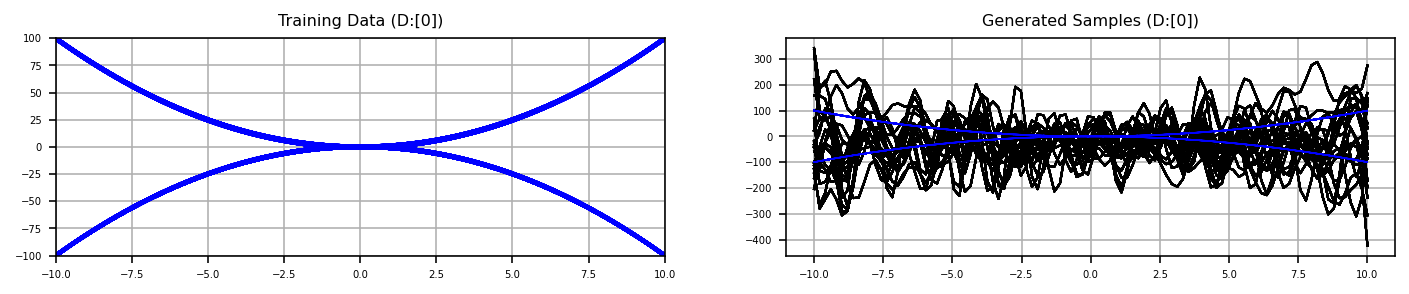

[1500/10000][15.00%] train loss:[0.630]
  [l1]:[0.370]
  [l2]:[0.260]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[1500/10000][15.00%] valid loss:[0.682]
  [l1]:[0.392]
  [l2]:[0.289]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[2000/10000][20.00%] train loss:[0.573]
  [l1]:[0.341]
  [l2]:[0.232]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[2000/10000][20.00%] valid loss:[0.599]
  [l1]:[0.351]
  [l2]:[0.247]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


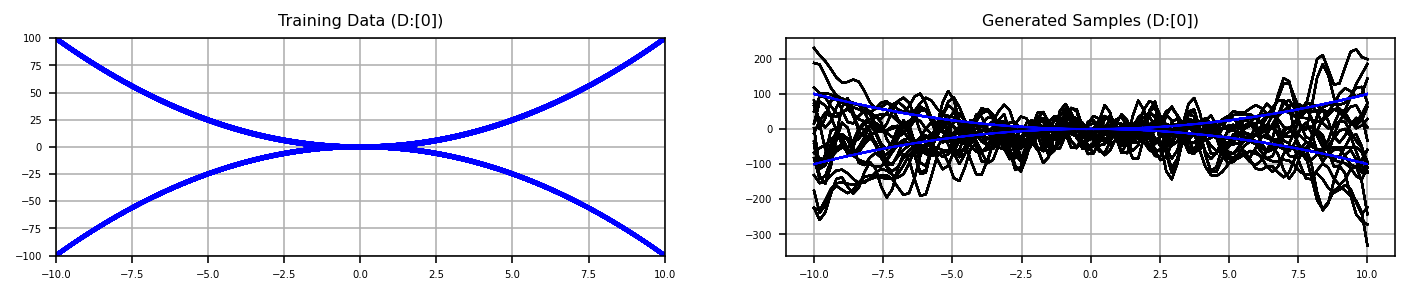

[2500/10000][25.00%] train loss:[0.545]
  [l1]:[0.336]
  [l2]:[0.209]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[2500/10000][25.00%] valid loss:[0.519]
  [l1]:[0.319]
  [l2]:[0.200]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[3000/10000][30.00%] train loss:[0.561]
  [l1]:[0.338]
  [l2]:[0.223]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[3000/10000][30.00%] valid loss:[0.628]
  [l1]:[0.351]
  [l2]:[0.277]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


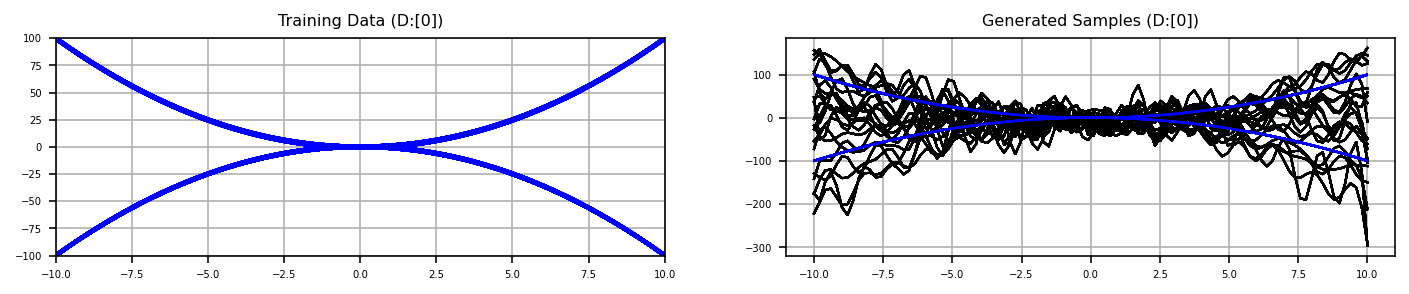

[3500/10000][35.00%] train loss:[0.504]
  [l1]:[0.317]
  [l2]:[0.187]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[3500/10000][35.00%] valid loss:[0.524]
  [l1]:[0.312]
  [l2]:[0.212]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[4000/10000][40.00%] train loss:[0.508]
  [l1]:[0.319]
  [l2]:[0.190]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[4000/10000][40.00%] valid loss:[0.680]
  [l1]:[0.368]
  [l2]:[0.312]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


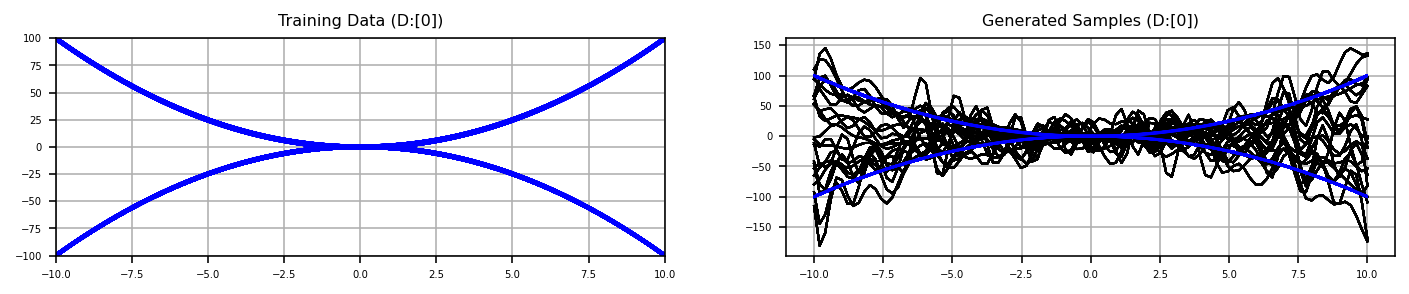

[4500/10000][45.00%] train loss:[0.466]
  [l1]:[0.295]
  [l2]:[0.171]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[4500/10000][45.00%] valid loss:[0.469]
  [l1]:[0.293]
  [l2]:[0.176]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[5000/10000][50.00%] train loss:[0.476]
  [l1]:[0.302]
  [l2]:[0.174]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[5000/10000][50.00%] valid loss:[0.518]
  [l1]:[0.314]
  [l2]:[0.204]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


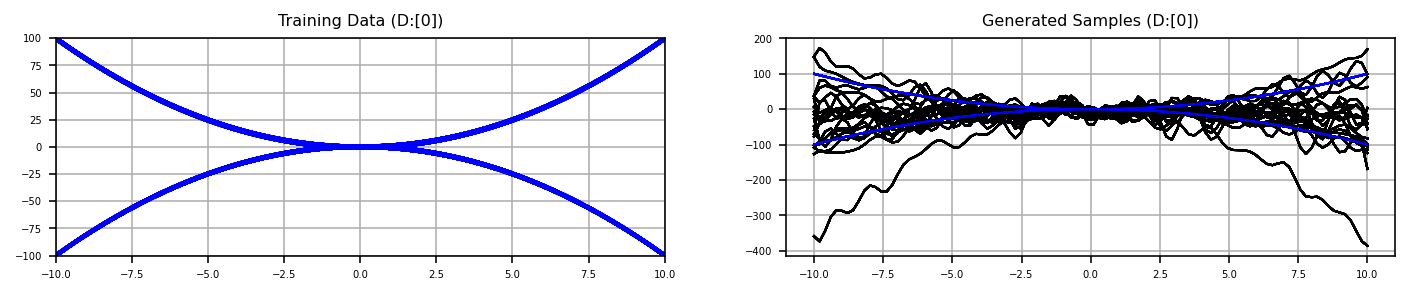

[5500/10000][55.00%] train loss:[0.495]
  [l1]:[0.312]
  [l2]:[0.183]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[5500/10000][55.00%] valid loss:[0.575]
  [l1]:[0.338]
  [l2]:[0.237]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[6000/10000][60.00%] train loss:[0.493]
  [l1]:[0.311]
  [l2]:[0.182]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[6000/10000][60.00%] valid loss:[0.528]
  [l1]:[0.309]
  [l2]:[0.219]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


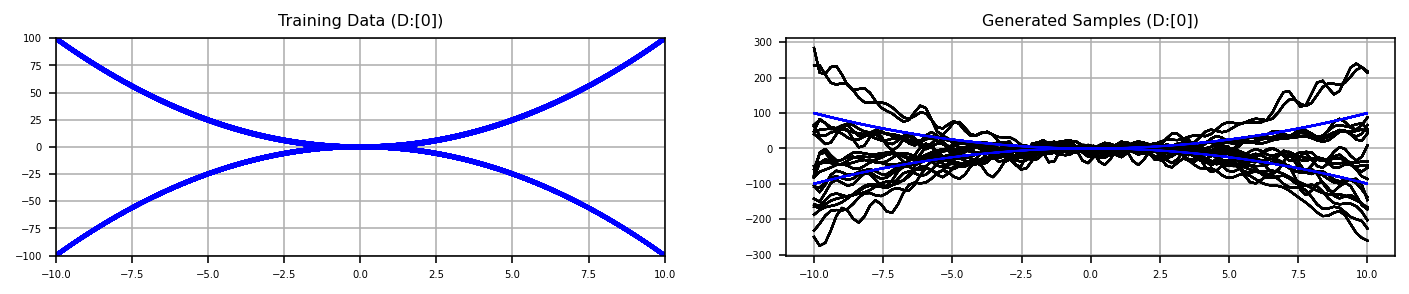

[6500/10000][65.00%] train loss:[0.422]
  [l1]:[0.276]
  [l2]:[0.146]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[6500/10000][65.00%] valid loss:[0.443]
  [l1]:[0.281]
  [l2]:[0.163]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[7000/10000][70.00%] train loss:[0.458]
  [l1]:[0.294]
  [l2]:[0.163]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[7000/10000][70.00%] valid loss:[0.578]
  [l1]:[0.340]
  [l2]:[0.238]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


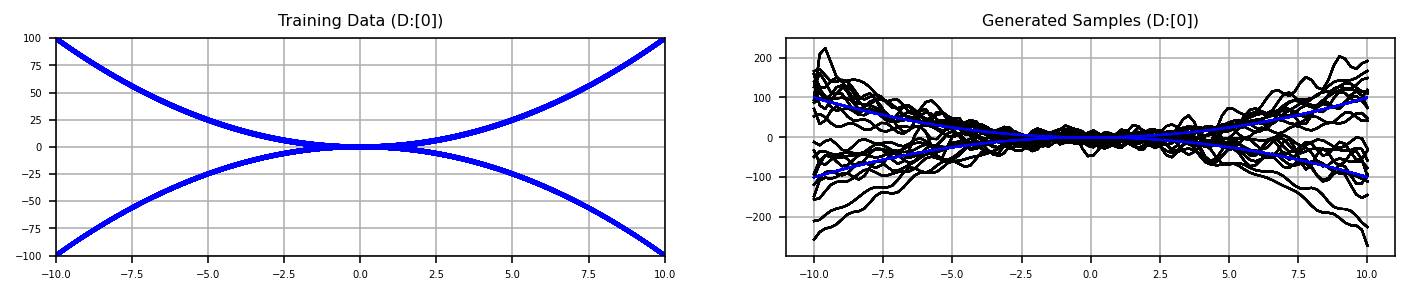

[7500/10000][75.00%] train loss:[0.478]
  [l1]:[0.300]
  [l2]:[0.177]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[7500/10000][75.00%] valid loss:[0.530]
  [l1]:[0.308]
  [l2]:[0.222]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[8000/10000][80.00%] train loss:[0.462]
  [l1]:[0.296]
  [l2]:[0.166]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[8000/10000][80.00%] valid loss:[0.469]
  [l1]:[0.292]
  [l2]:[0.177]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


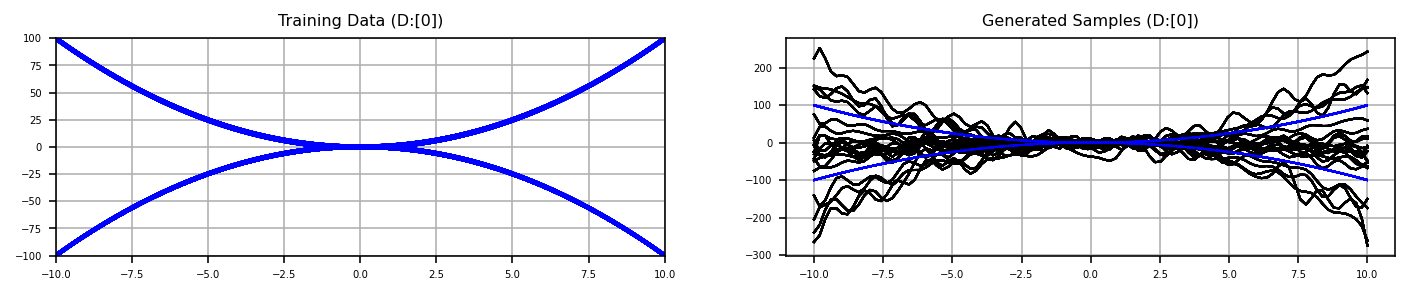

[8500/10000][85.00%] train loss:[0.484]
  [l1]:[0.305]
  [l2]:[0.179]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[8500/10000][85.00%] valid loss:[0.393]
  [l1]:[0.254]
  [l2]:[0.139]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[9000/10000][90.00%] train loss:[0.448]
  [l1]:[0.294]
  [l2]:[0.154]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[9000/10000][90.00%] valid loss:[0.429]
  [l1]:[0.277]
  [l2]:[0.152]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


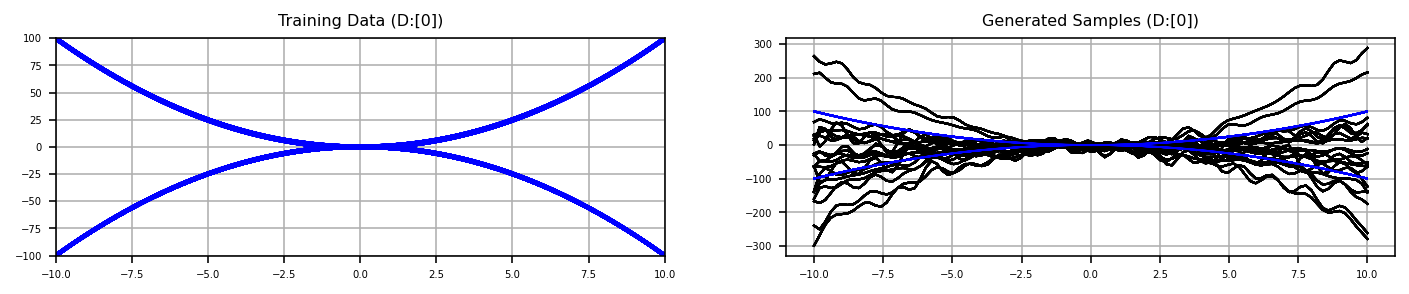

[9500/10000][95.00%] train loss:[0.453]
  [l1]:[0.290]
  [l2]:[0.162]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[9500/10000][95.00%] valid loss:[0.468]
  [l1]:[0.296]
  [l2]:[0.172]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[9999/10000][99.99%] train loss:[0.459]
  [l1]:[0.293]
  [l2]:[0.166]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[9999/10000][99.99%] valid loss:[0.470]
  [l1]:[0.295]
  [l2]:[0.175]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


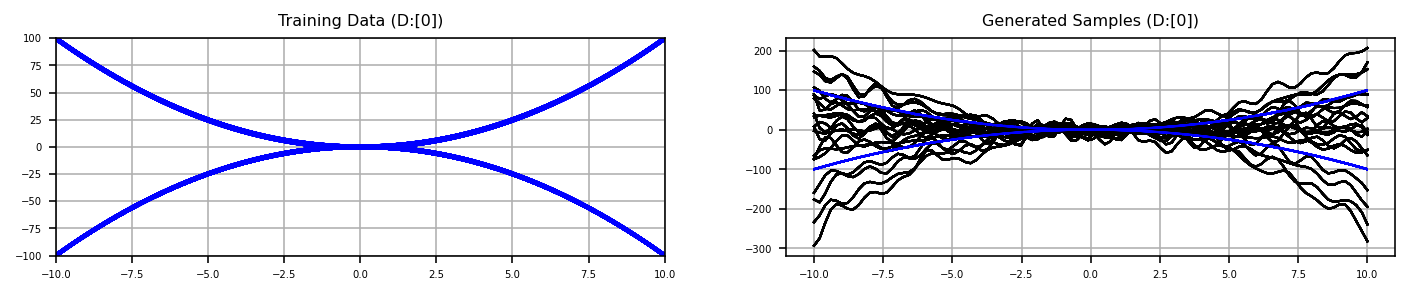

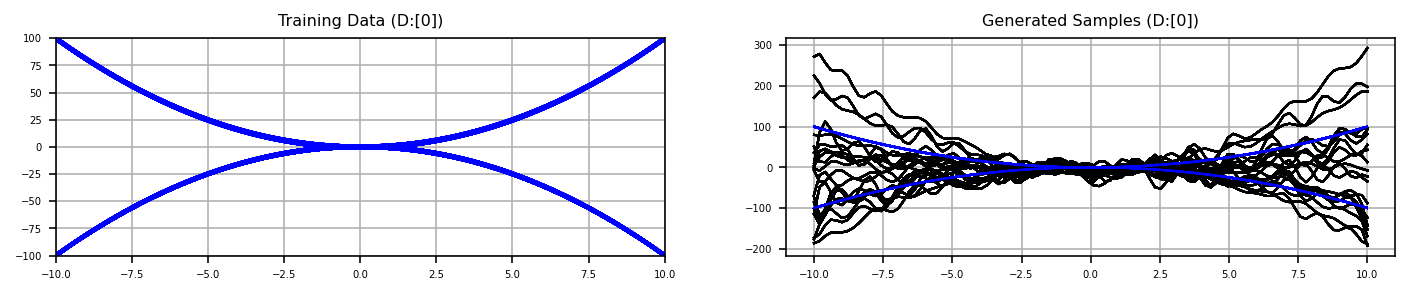

Done.


In [5]:
hyp_lens = [1.0]

for len in hyp_lens:
    print("SE kernel length parameter = ", len)
    train_losses, valid_losses, outs = ddpm_train_wrapper(
        times,x_0,dc,actv=actv,
        hyp_len_forward=len,hyp_len_projection=len,hyp_sig2w=1e-6,
        n_sample=20,base_lr=base_lr,MAX_ITER=10000,BATCH_SIZE=BATCH_SIZE,
        l1_w=l1_w,l2_w=l2_w,huber_w=huber_w,smt_l1_w=smt_l1_w,
        A=A,V=V,vel_w=1e-6,acc_w=1e-6,
        RKHS_PROJECTION_EACH_X_T=True,device=device)
print ("Done.")

In [ ]:
x_test = torch2np(x_0[BATCH_SIZE:BATCH_SIZE+20])
y_test = torch2np(outs)

print(x_test.shape)
print(y_test.shape)

power = power_test(X_samples=x_test,Y_samples=y_test,gamma={'gain': 1.0, 'len':hyp_lens[0]}, n_tests=100, n_perms=100 )

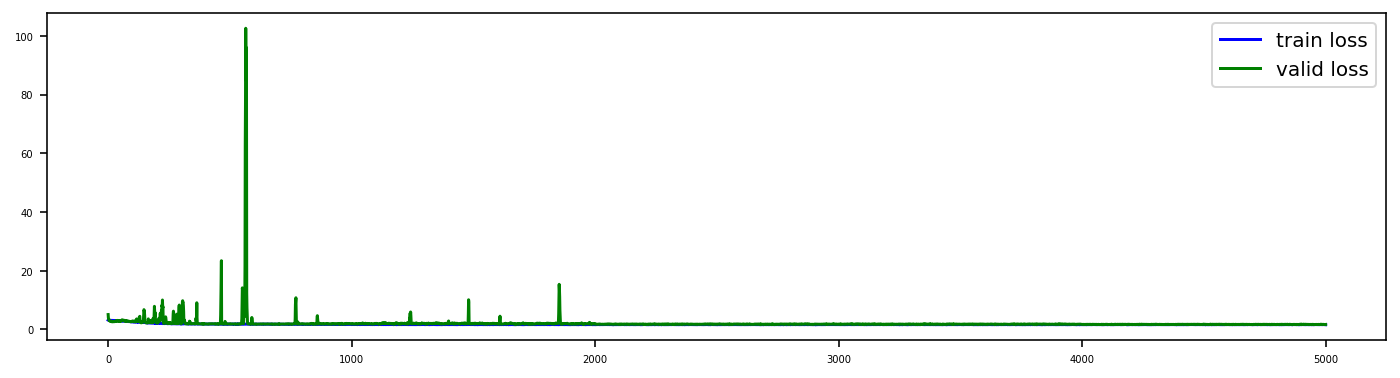

In [6]:
x_range = np.arange(0, 5000, 1)

plt.figure(figsize=(12,3))
plt.plot(x_range, train_losses, c='b', label='train loss')
plt.plot(x_range, valid_losses, c='g', label='valid loss')
plt.legend()
plt.show()

### Baseline

[0/50000][0.00%] loss:[3.071]
  [l1]:[1.095]
  [l2]:[1.976]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


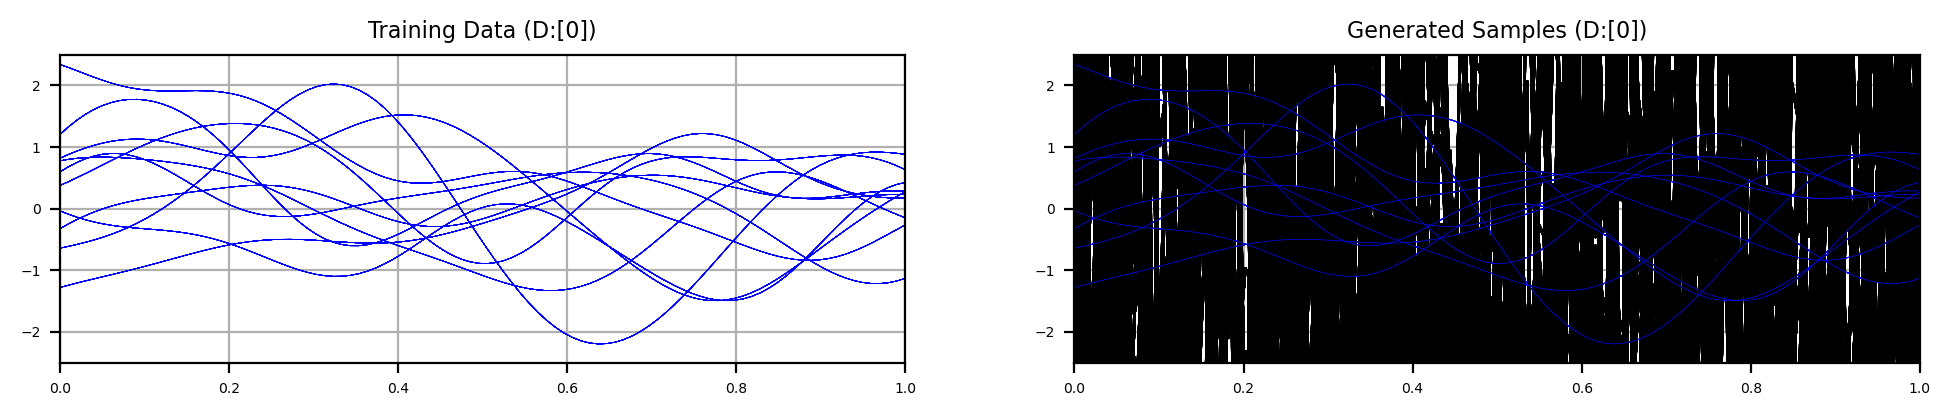

[2500/50000][5.00%] loss:[0.471]
  [l1]:[0.287]
  [l2]:[0.185]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[5000/50000][10.00%] loss:[0.440]
  [l1]:[0.271]
  [l2]:[0.169]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


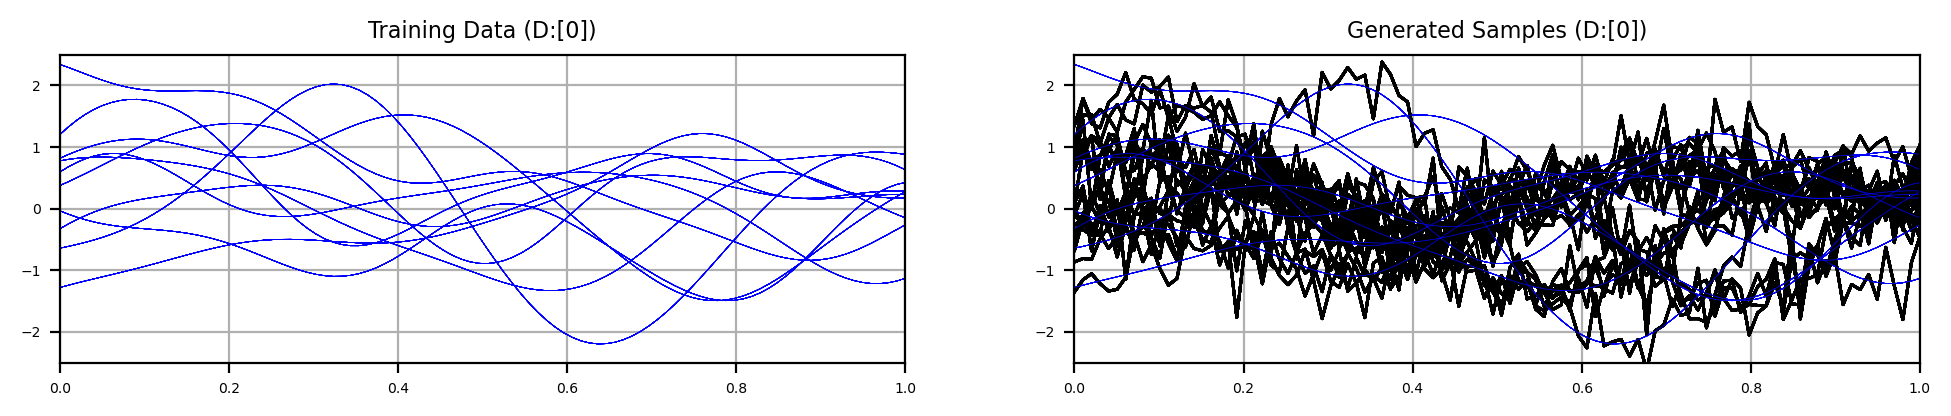

[7500/50000][15.00%] loss:[0.480]
  [l1]:[0.293]
  [l2]:[0.186]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[10000/50000][20.00%] loss:[0.486]
  [l1]:[0.294]
  [l2]:[0.192]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


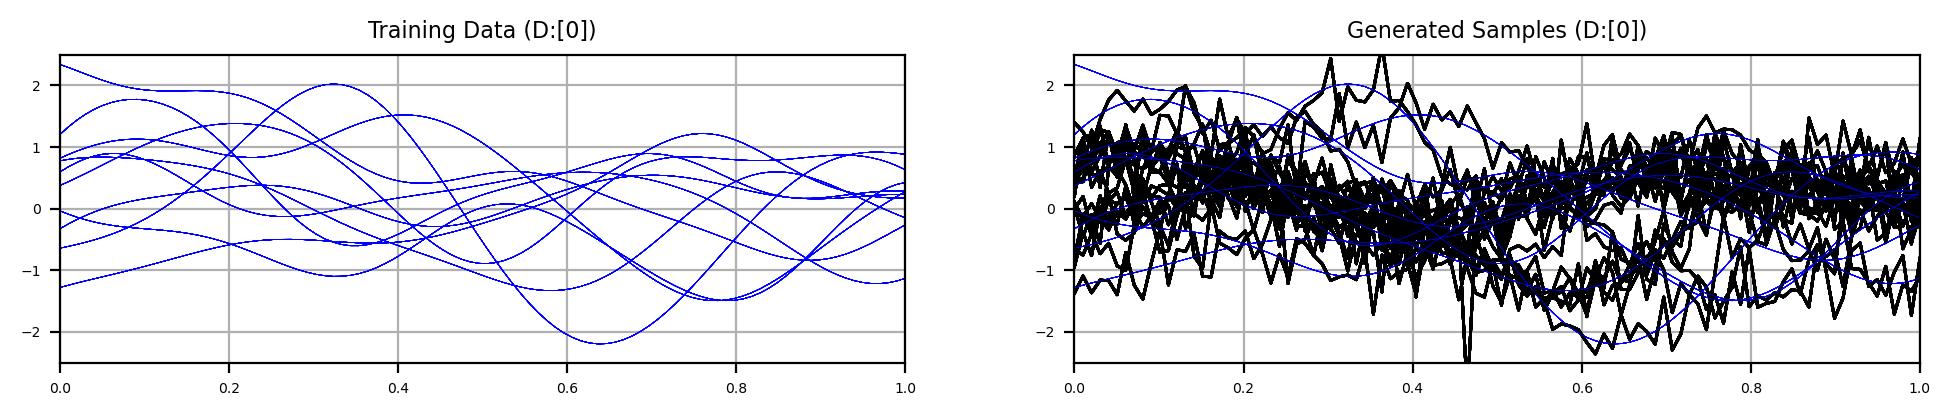

[12500/50000][25.00%] loss:[0.427]
  [l1]:[0.266]
  [l2]:[0.161]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[15000/50000][30.00%] loss:[0.470]
  [l1]:[0.282]
  [l2]:[0.188]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


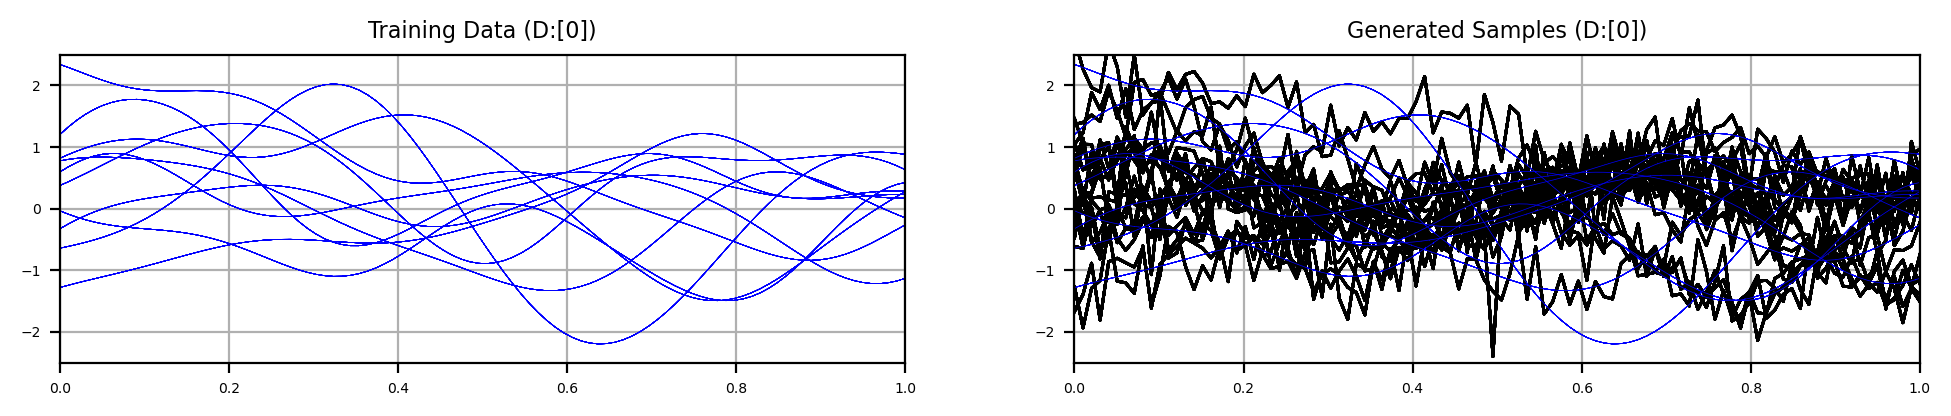

[17500/50000][35.00%] loss:[0.417]
  [l1]:[0.257]
  [l2]:[0.160]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[20000/50000][40.00%] loss:[0.531]
  [l1]:[0.316]
  [l2]:[0.215]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


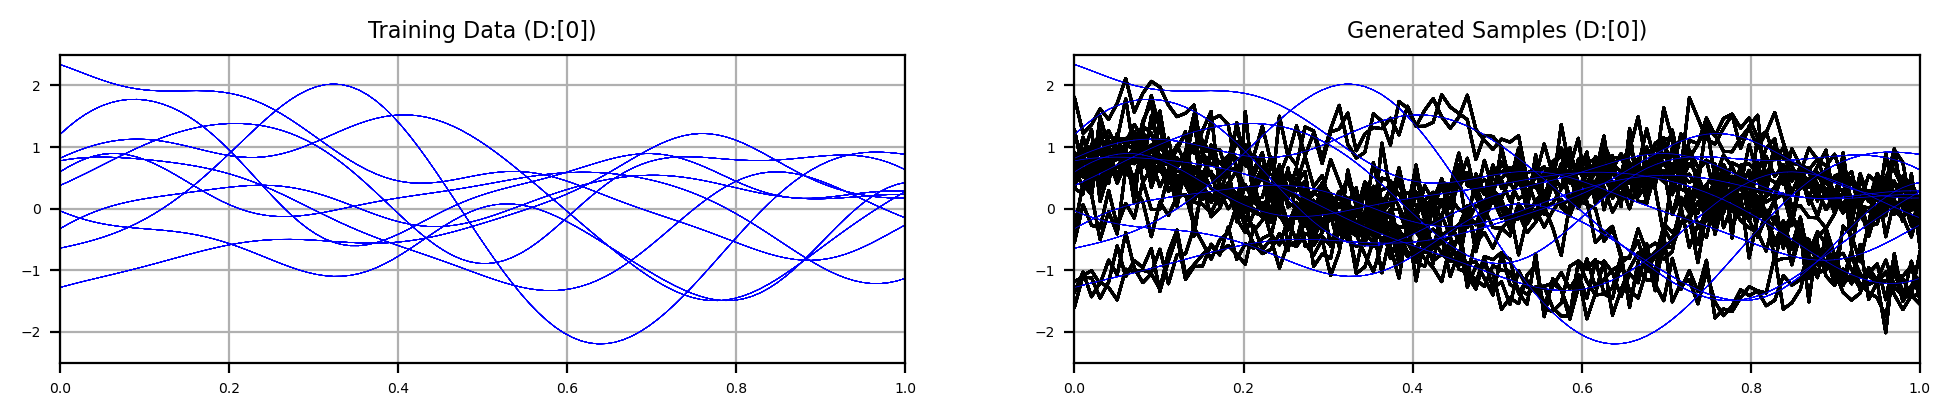

[22500/50000][45.00%] loss:[0.468]
  [l1]:[0.284]
  [l2]:[0.184]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[25000/50000][50.00%] loss:[0.417]
  [l1]:[0.264]
  [l2]:[0.153]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


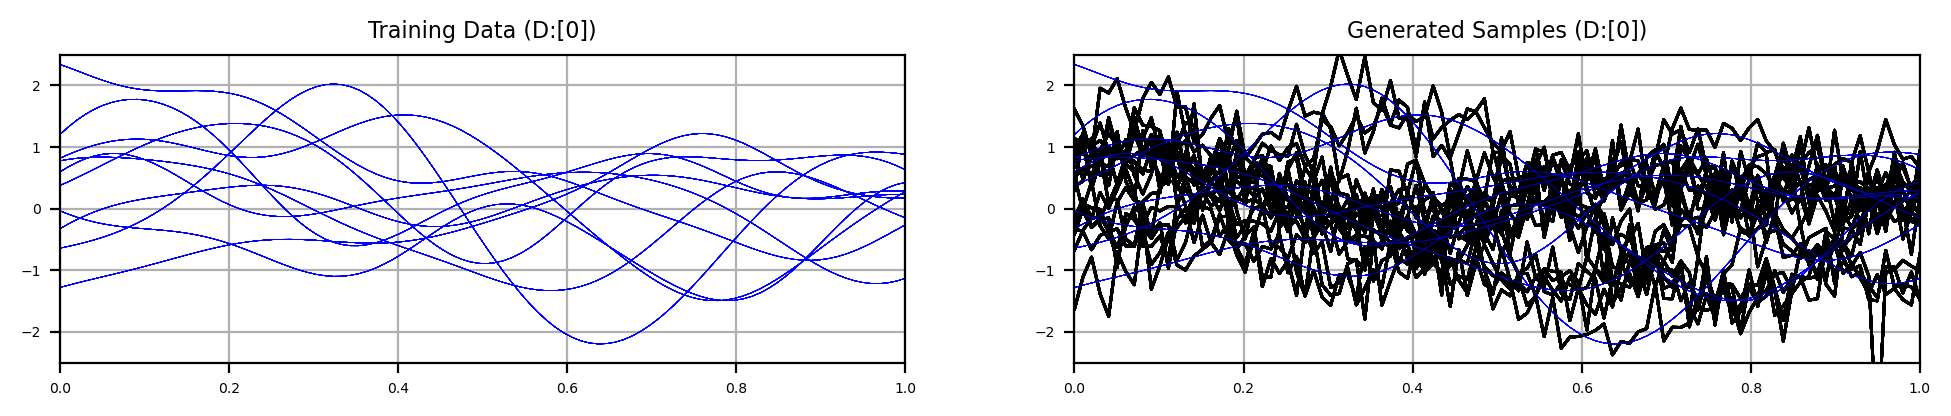

[27500/50000][55.00%] loss:[0.401]
  [l1]:[0.258]
  [l2]:[0.142]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[30000/50000][60.00%] loss:[0.433]
  [l1]:[0.268]
  [l2]:[0.165]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


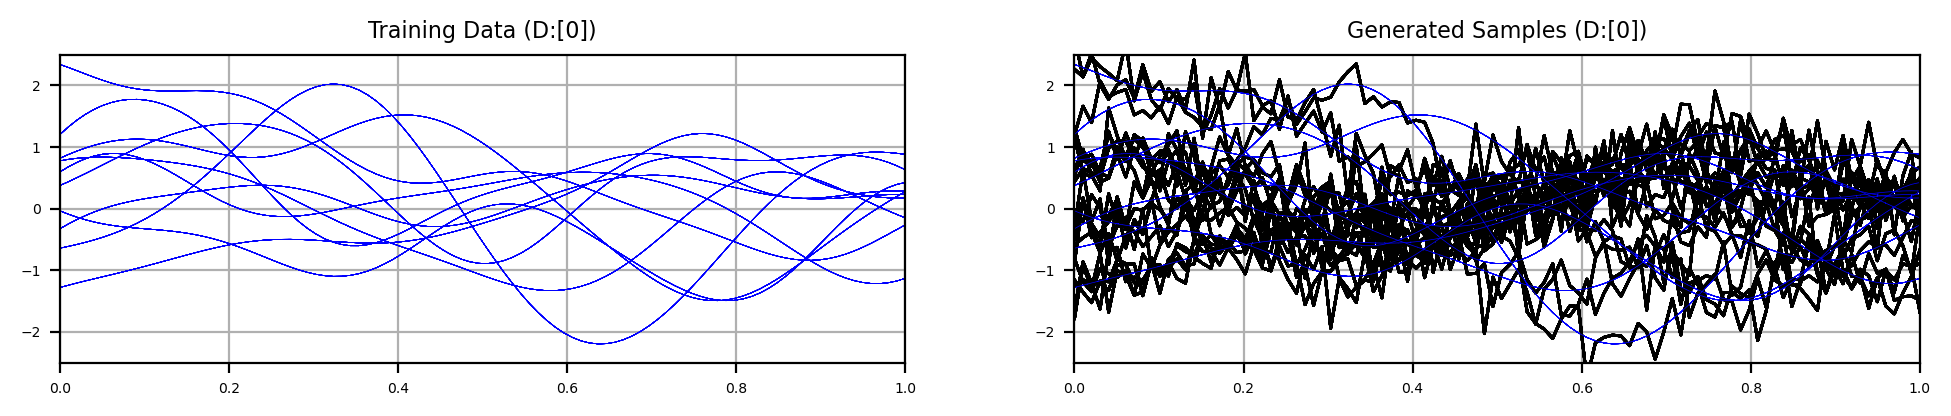

[32500/50000][65.00%] loss:[0.492]
  [l1]:[0.297]
  [l2]:[0.195]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[35000/50000][70.00%] loss:[0.477]
  [l1]:[0.286]
  [l2]:[0.190]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


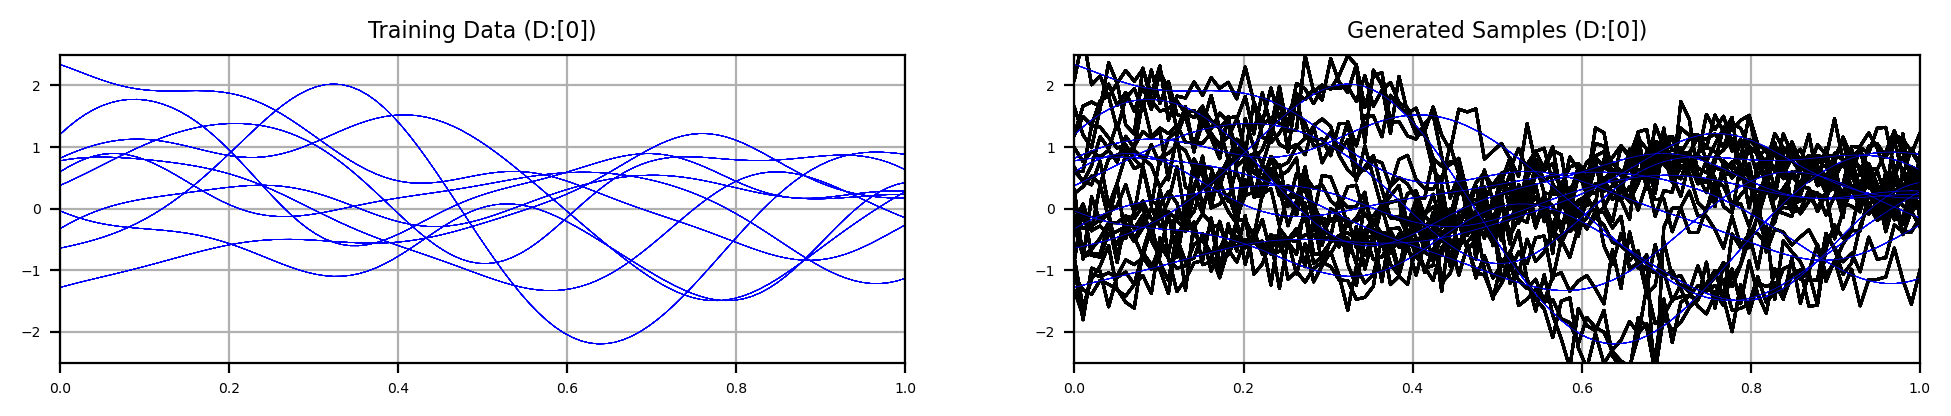

[37500/50000][75.00%] loss:[0.406]
  [l1]:[0.254]
  [l2]:[0.152]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[40000/50000][80.00%] loss:[0.438]
  [l1]:[0.270]
  [l2]:[0.168]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


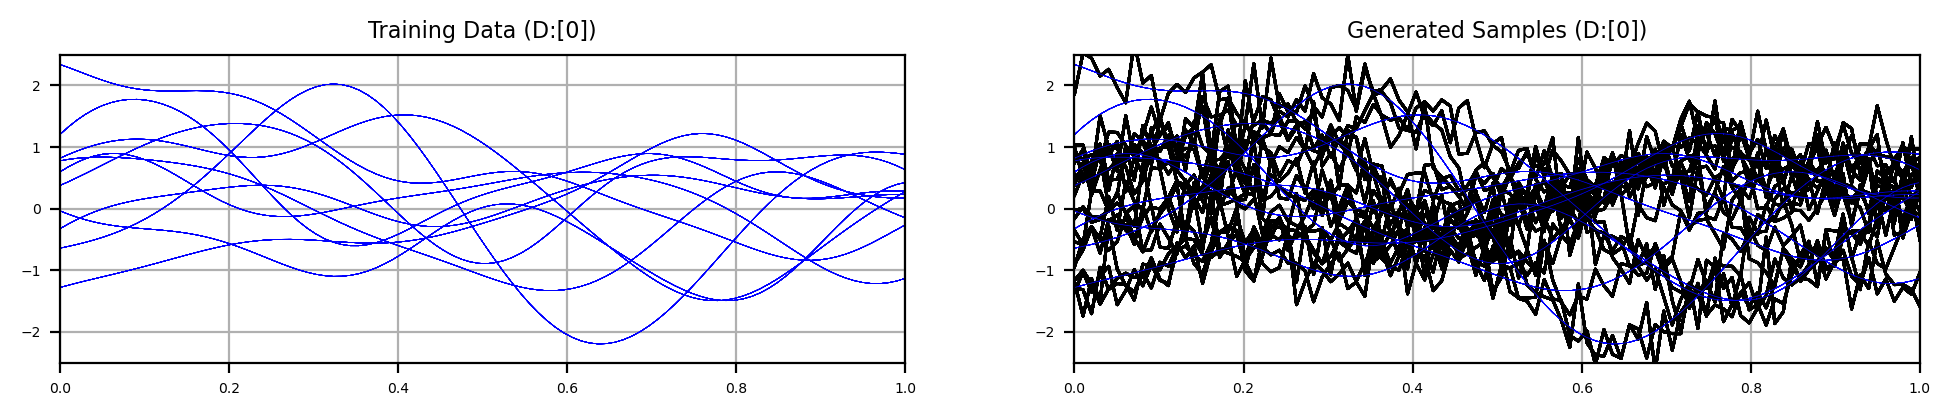

[42500/50000][85.00%] loss:[0.458]
  [l1]:[0.276]
  [l2]:[0.182]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[45000/50000][90.00%] loss:[0.473]
  [l1]:[0.289]
  [l2]:[0.184]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


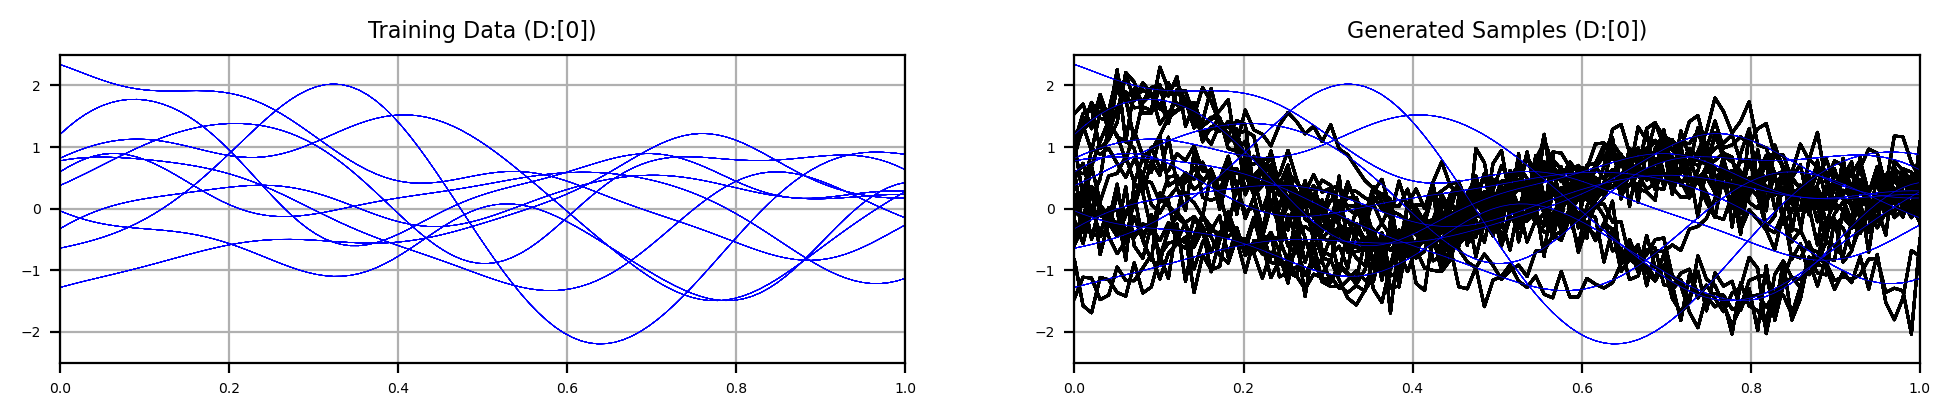

[47500/50000][95.00%] loss:[0.430]
  [l1]:[0.266]
  [l2]:[0.164]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[49999/50000][100.00%] loss:[0.436]
  [l1]:[0.271]
  [l2]:[0.165]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


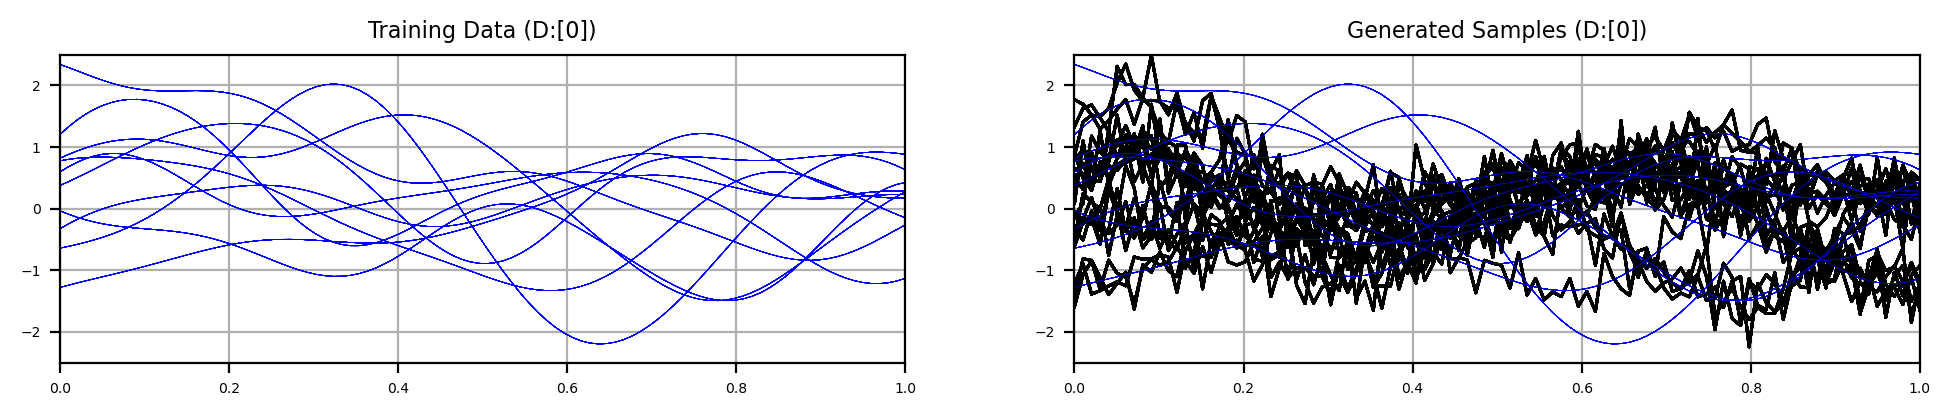

Done.


In [6]:
ddpm_train_wrapper(
    times,x_0,dc,actv=actv,
    hyp_len_forward=0.0,hyp_len_projection=0.0,hyp_sig2w=1e-6,
    n_sample=20,base_lr=base_lr,MAX_ITER=MAX_ITER,BATCH_SIZE=BATCH_SIZE,
    l1_w=l1_w,l2_w=l2_w,huber_w=huber_w,smt_l1_w=smt_l1_w,
    A=A,V=V,vel_w=0.0,acc_w=0.0,
    RKHS_PROJECTION_EACH_X_T=False,device='cpu')
print ("Done.")